# Script for displaying simulation data
This script is made to easily display simulation data

In [3]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl import Workbook, load_workbook
import os

#Finding excel file and working dir
workbookFile = "SimulationRuns02042025.xlsx"
workingDir = os.getcwd().replace("DataDisplay","")
print(workingDir)

#Data class, which holds all info about the data which is gotten automatically from the excel file
def Data(studentName:str,cellRow:int):
    filePath = ""
    simulationParams = {}
    workbook = load_workbook(workingDir+"DataDisplay\\"+workbookFile)
    sheet = workbook.active
    filePath = workingDir + "SimulationData\\"+ studentName.capitalize()+ "\\" + sheet[f'A{cellRow}'].value
    #Iterate over all colums and gather data about simulation parameters
    for i in ["B","C","D","E","F","G","H","I"]:
        simulationParams[((sheet[f'{i}1'].value).lower()).replace(" ","_")] = sheet[f'{i}{cellRow}'].value
    table = None
    try:
        table = pd.read_csv(filePath,delimiter=" ",header=None,names=["Z","D","V","T"])
    except:
        print(f'File {filePath} probably not found, irregardless there is no pandas table...')
    return {"filePath":filePath,"simulationParams":simulationParams,"table":table}
    

def getSeveralSims(studentName:str, rows:list=[],rowRange:list=[]):
    data = []
    if len(rows) == 0 and len(rowRange)==0:
        print("No rows or range given, cannot return data.")
        return
    elif len(rows) > 0 and len(rowRange) > 0:
        print("Row and range both specified, cannot get data as I do not know which one to trust.")
        return
    elif len(rows) > 0 and len(rowRange) == 0:
        print(f'Getting data from rows: {rows}')
        for i in rows:
            data.append(Data(studentName,i))
        return data
    elif len(rowRange) == 2 and len(rows) == 0:
        print(f'Getting data from range, from row {rowRange[0]} to {rowRange[1]}, inclusive')
        for i in range(rowRange[0],rowRange[1]+1):
            data.append(Data(studentName,i))
        return data
    elif len(rowRange) > 2:
        print("Range cannot include more than 2 numbers.")

c:\Users\Thea-\Documents\Python\MathPhyscisSubjectModuleProject\


In [4]:
#Set your default simulation (meaning the simulation you have run where all variables are "default" for you)
#For me it is T1 at row 5
default = Data("Thea",5)

#In the future, we will have some way of getting the theoretical data here too, but for now it is empty
theory = None

#I get all my sims, luckily they are right next to eachother in the excel sheet
sims = getSeveralSims("Thea",rowRange=[6,11])

Getting data from range, from row 6 to 11, inclusive


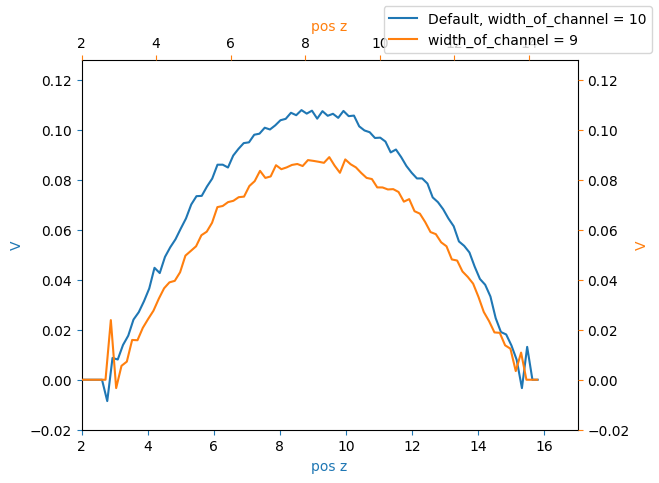

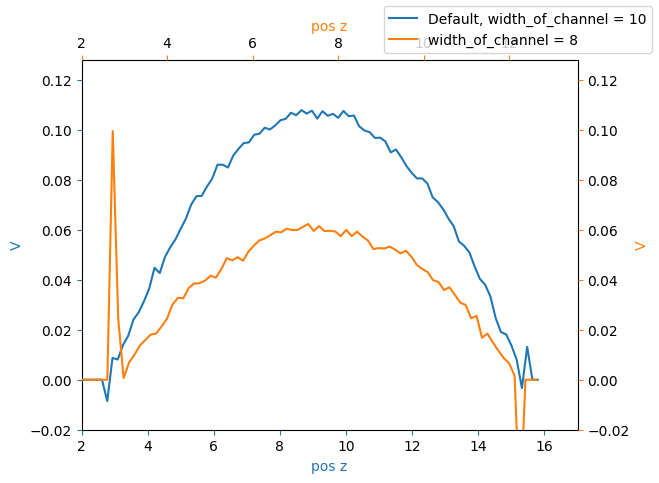

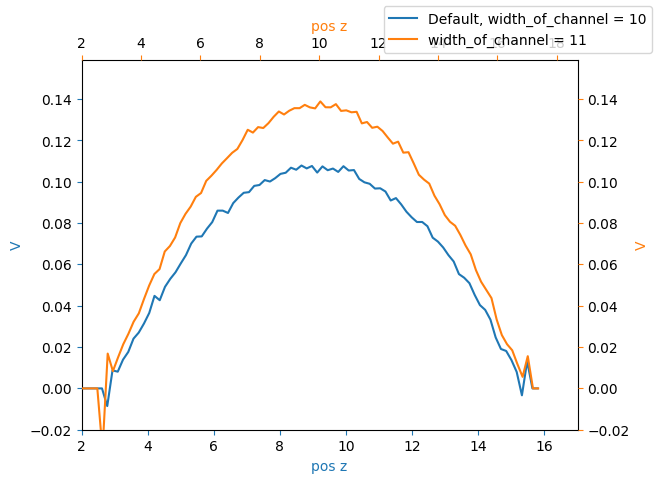

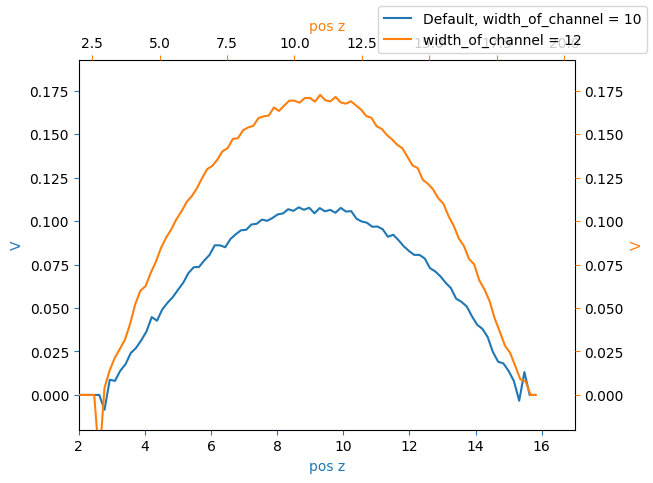

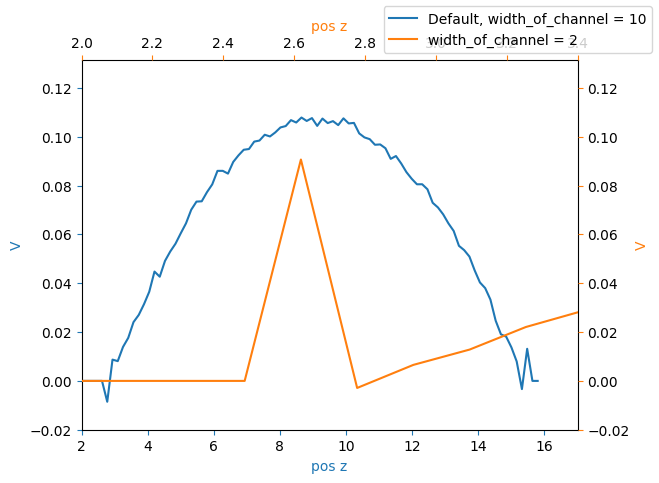

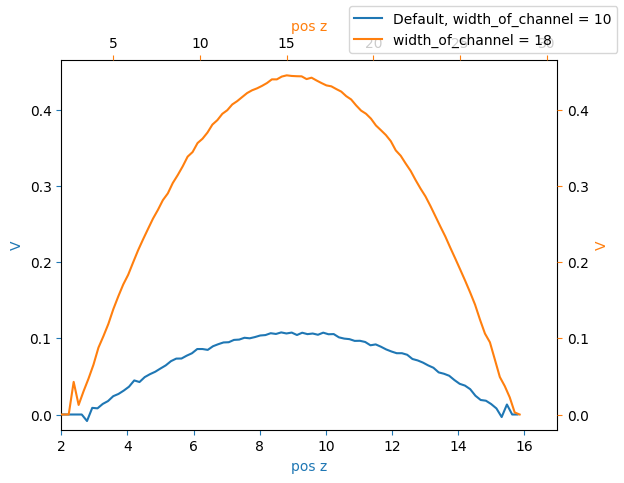

In [11]:
#Function to somewhat clean up the spiking action going on at the walls, only used for velocity
def cleanSpikes(velocity):
    newz = []
    for i,coord in enumerate(velocity):
        if(i==0):
            newz.append(coord)
            continue
        if((coord-newz[-1]) > 0.1 or (coord-newz[-1]) < -0.1):
            newz.append(0)
        else: newz.append(coord)
    return newz

#Function purely to not have to look at this exact code over and over again
def plotInFigure(plot:plt.Axes,sim:dict,label:str,plottype:str,default:dict=None):
    table = sim["table"]
    plot.plot(table["Z"],cleanSpikes(table[plottype]) if (plottype == "V") else table[plottype],label=label,color="C0" if default==None else "C1")
    plot.set_xlabel("pos z",color="C0" if default==None else "C1")
    plot.set_ylabel(plottype,color="C0" if default==None else "C1")
    plot.tick_params(axis="x",color="C0" if default==None else "C1")
    plot.tick_params(axis="y",color="C0" if default==None else "C1")
    plot.set_xlim(2,17)
    if default != None:
        diff = sim["simulationParams"]["width_of_channel"] - default["simulationParams"]["width_of_channel"]
        plot.set_xlim(2,17+diff*1.7)
        plot.xaxis.tick_top()
        plot.xaxis.set_label_position("top")
        plot.yaxis.tick_right()
        plot.yaxis.set_label_position("right")

#We now make the plotting function
#Plottype is either "D" density, "V" streaming velocity or "T" temperature
def plotMySim(sim:Data,default:Data,plotType:str):
    simName = ""
    defaultName = ""
    #We figure out how the simulation is different from the default, we use this for telling them apart in naming and labels
    for key,value in sim["simulationParams"].items():
        #We ignore any discrepencies in timeblocks and steps per timeblock as we arent really interested in what happens when we vary them
        if key == "timeblocks" or key == "steps_per_timeblock":
            continue
        if value != default["simulationParams"][key]:
            simName = f'{key} = {value}'
            defaultName = f'Default, {key} = {default["simulationParams"][key]}'
    
    fig = plt.figure()
    fig.align_ylabels()

    defaultPlot = fig.add_subplot(111,label="default")
    simPlot = fig.add_subplot(111,label=simName,frame_on=False)

    ylim = max(max(cleanSpikes(default["table"][plotType])),max(cleanSpikes(sim["table"][plotType]))) if plotType == "V" else max(max(default["table"][plotType]),max(sim["table"][plotType]))

    defaultPlot.set_ylim((-0.02, ylim+0.02))
    simPlot.set_ylim((-0.02, ylim+0.02))

    plotInFigure(defaultPlot,default,defaultName,plotType)
    plotInFigure(simPlot,sim,simName,plotType,default)

    fig.legend()
    plt.show()

#Makes a plot for every sim I have gotten earlier
for i in range(len(sims)):
    plotMySim(sims[i],default,"V")



